In [166]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import operator
%matplotlib inline


In [167]:
data = pd.read_csv('StudentsPerformance.csv')

In [168]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [170]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [171]:
data.shape

(1000, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x26529E20>,
      dtype=object)

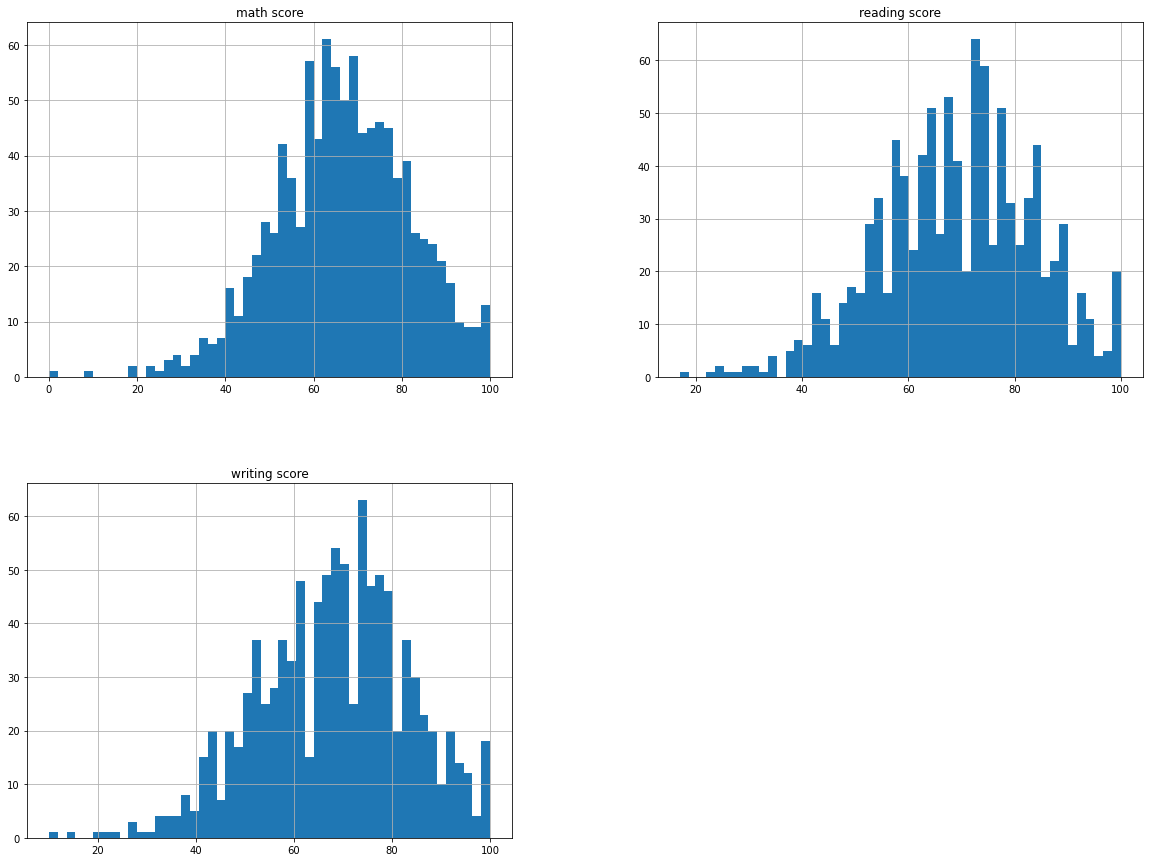

In [172]:
data.hist(bins=50, figsize=(20, 15))

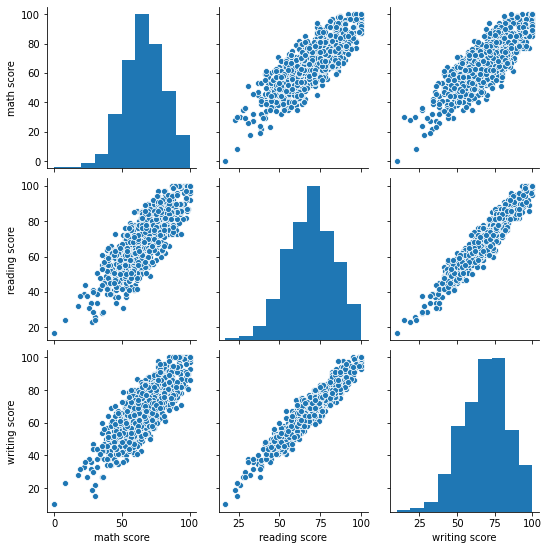

In [173]:
sns.pairplot(data)

In [174]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


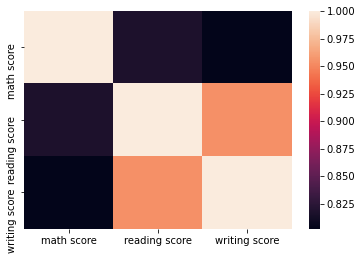

In [175]:
sns.heatmap(data.corr())

In [176]:
data['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

In [177]:
a=[]
a=data['test preparation course']
l=[]
for i in a:
    if(i=='completed'):
        l.append('1')
    else:
        l.append('0')
print(l)

['0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0',

In [178]:
X = data[['math score', 'reading score', 'writing score']].values
Y = l

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [181]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [182]:
model.fit(X_train,Y_train)

LogisticRegression()

In [183]:
y_pred=[]
y_pred=model.predict(X_test)

In [184]:
y_pred

array(['1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [185]:
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of Logisic Regression on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of Logistic Regression on training set: 0.68
Accuracy of Logisic Regression on test set: 0.73


In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [187]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
print(knn.predict(X_test))
y_pred=knn.predict(X_test)

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.66
['1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1'
 '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1'
 '1' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '1' '1' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '1' '0']


In [188]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)
sse

[529917.0200000003,
 223061.46766455148,
 139245.135265001,
 109190.83959620663,
 87762.71756056171,
 77344.32772749603,
 68844.4571862937,
 60418.81667320006,
 54013.546727135894]

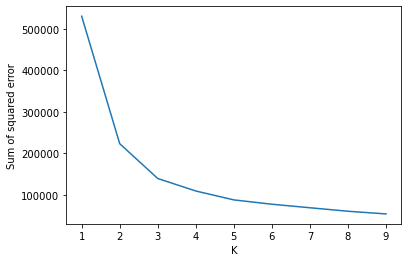

In [189]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [190]:
print('Accuracy of KNN on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of KNN on training set: 0.72
Accuracy of KNN on test set: 0.66


In [198]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X_train)
labels=clustering.labels_
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool) 
core_samples_mask[clustering.core_sample_indices_] = True

In [199]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_clusters_

41

In [200]:
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 


['y', 'b', 'g', 'r']


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 800